## **Part 2: Stitch five images together to create a panorama**

In [ ]:
filenames = ["images/1.png", "images/2.png", "images/3.png", "images/4.png", "images/5.png"]

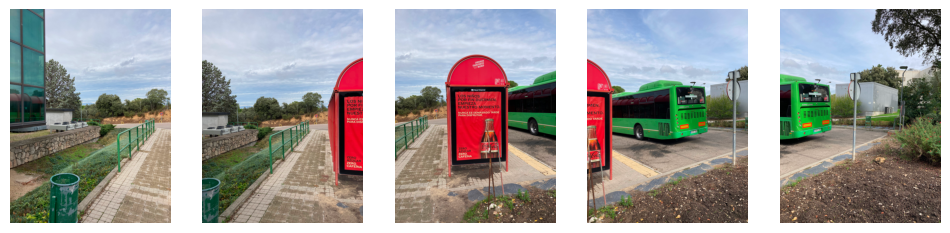

In [11]:
### TODO
# Draw images
import cv2
import matplotlib.pyplot as plt

def draw_images(images):
    width = len(images)
    fig, axes = plt.subplots(1, width, figsize=(12, 3))
    
    if width == 1:
        axes = [axes]
        
    for i in range(width):
        axes[i].imshow(images[i])
        axes[i].axis("off")

imgs = []

for i in filenames:
    img = cv2.imread(i)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img_color)

draw_images(imgs)


#### The goal of this part of the assignment is to combine five horizontally overlapping photographs into a single panoramic image. Images must be supplied in left-to-right order.

1. Detectamos punto de interés mediante con técnicas de extracción de esquinas

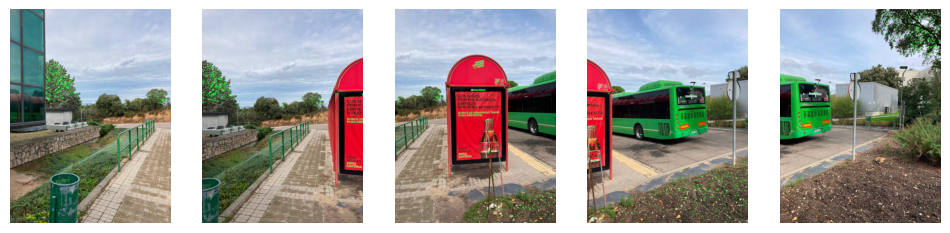

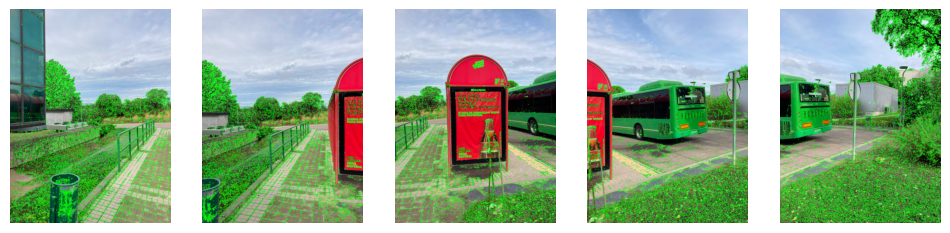

In [22]:
import cv2
import copy
import numpy as np

keypoints_harris = []
keypoints_sift = []


harris_detector = cv2.GFTTDetector_create()
sift_detector = cv2.SIFT_create()

for img in imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kp_harris = harris_detector.detect(gray, None)
    kp_sift = sift_detector.detect(gray, None)

    keypoints_harris.append(kp_harris)
    keypoints_sift.append(kp_sift)

_imgs = copy.deepcopy(imgs)
for idx in range(len(_imgs)):
    cv2.drawKeypoints(_imgs[idx], keypoints_harris[idx], _imgs[idx], (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

draw_images(_imgs)

for idx in range(len(_imgs)):
    cv2.drawKeypoints(_imgs[idx], keypoints_sift[idx], _imgs[idx], (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

draw_images(_imgs)


In [ ]:
### TODO
# Draw all matches
_imgs = []
for idx, (elem1, elem2) in enumerate(pairs):
    _imgs.append(cv2.drawMatches(imgs[elem1], keypoints[elem1], imgs[elem2], keypoints[elem2], matches[idx], None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT))
draw_images(_imgs)

In [ ]:
### TODO
# Draw correct matches
_imgs = []
for idx, (elem1, elem2) in enumerate(pairs):
    draw_params = dict(matchColor=(0,255,0), singlePointColor=None, matchesMask=masks_inliers[idx], flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
    _imgs.append(cv2.drawMatches(imgs[elem1], keypoints[elem1], imgs[elem2], keypoints[elem2], matches[idx], None, matchesThickness=3, **draw_params))
draw_images(_imgs)

In [ ]:
### TODO
# Draw panorama
draw_images([img])